In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
tips = sns.load_dataset('tips')

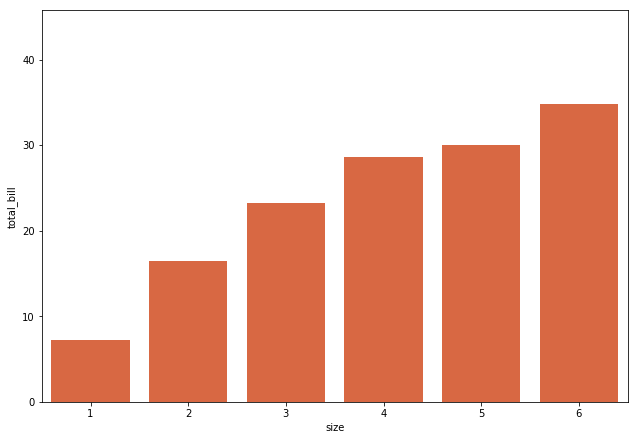

In [0]:
fig = plt.figure(figsize=(10.5, 7.2))
ax = sns.barplot('size', y='total_bill', 
                 data=tips, palette=['#F15B2A'],
                 errwidth=0)

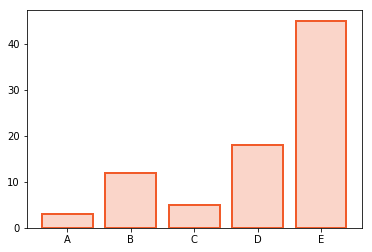

In [0]:
value = [3, 12, 5, 18, 45]
label = ('A', 'B', 'C', 'D', 'E')
pos = np.arange(len(label))

plt.bar(pos, value,
        color=(240/256, 90/256, 40/256, 0.25),
        edgecolor='#F15B2A', linewidth=2)

plt.xticks(pos, label)
plt.show()

In [0]:
import pandas as pd

df = pd.DataFrame(data={'time':[6, 7, 8, 9, 10],
                       'sun_light':[50, 80, 100, 300, 170]})

df.head()

,time,sun_light
0,6,50
1,7,80
2,8,100
3,9,300
4,10,170


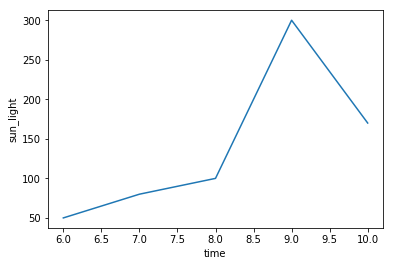

In [0]:
ax = sns.lineplot(x='time', y='sun_light', data=df)

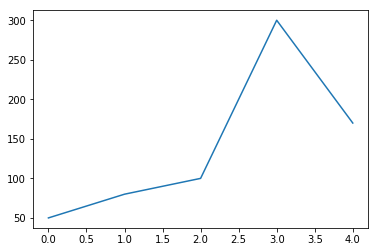

In [0]:
ax = sns.lineplot(data=df['sun_light'])

In [0]:
df['wind_speed'] = [46, 98, 110, 70, 150]

df.head()

,time,sun_light,wind_speed
0,6,50,46
1,7,80,98
2,8,100,110
3,9,300,70
4,10,170,150


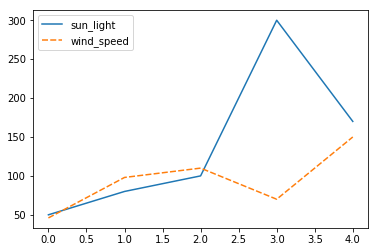

In [0]:
ax = sns.lineplot(data=[df['sun_light'], df['wind_speed']])

In [0]:
pd.melt(df, ['time'])

,time,variable,value
0,6,sun_light,50
1,7,sun_light,80
2,8,sun_light,100
3,9,sun_light,300
4,10,sun_light,170
5,6,wind_speed,46
6,7,wind_speed,98
7,8,wind_speed,110
8,9,wind_speed,70
9,10,wind_speed,150


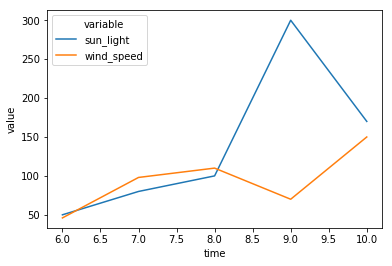

In [0]:
ax = sns.lineplot(x='time', y='value', hue='variable',
                 data=pd.melt(df, ['time']))

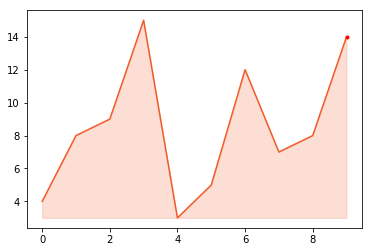

In [0]:
data = [4, 8, 9, 15, 3, 5, 12, 7, 8, 14]

plt.plot(data, color='#F15B2A')

plt.fill_between(range(len(data)),
                 data,
                 len(data)*[min(data)],
                 alpha=0.2,
                 color='#F15B2A')

plt.plot(len(data) - 1,
         data[-1],
         'r.')

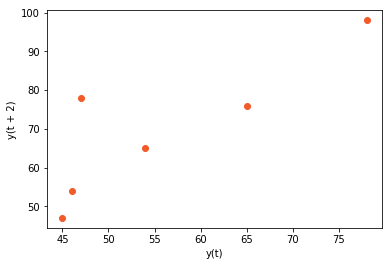

In [0]:
temp_series = pd.DataFrame(data={'temperature':[45, 46, 47, 54, 78, 65, 98, 76]})

pd.plotting.lag_plot(temp_series, lag=2, c='#F15B2A')

In [0]:
subjects = {'Maths':8, 'Language':7, 'Technology':10, 'Natural Science':6}
df = pd.DataFrame(data=subjects, index=['John'])

df

,Maths,Language,Technology,Natural Science
John,8,7,10,6


In [0]:
values = df.iloc[0].tolist()
values.append(values[0])
values

[8, 7, 10, 6, 8]

In [0]:
angles = [a/4 * 2 * np.pi for a in range(4)]
angles.append(angles[0])
angles

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

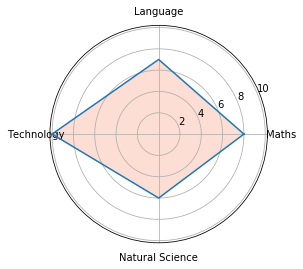

In [0]:
plt.subplot(111, polar=True)
plt.xticks(angles[:-1], subjects.keys())
plt.plot(angles, values)
plt.fill(angles, values, '#F15B2A', alpha=0.2)

In [0]:
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install mapclassify
!pip install geoplot

In [0]:
import geopandas
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0.002791
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0.001503
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",0.056823


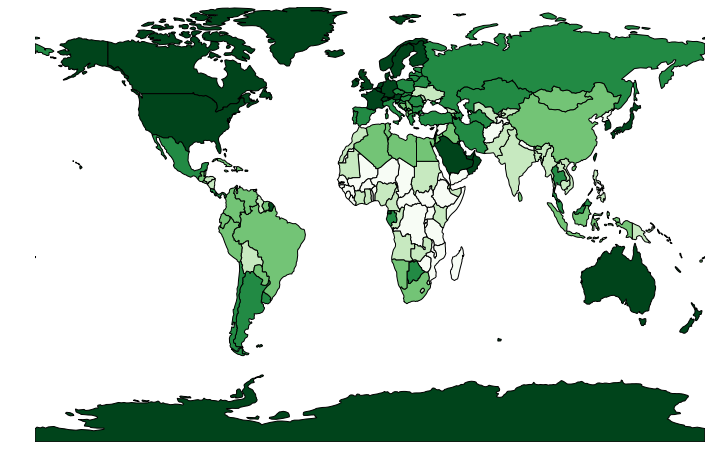

In [0]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(12, 8))